<a href="https://colab.research.google.com/github/khirasagar079/House-price-prediction/blob/main/Customer_Segmentation_using_K_means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score


In [12]:
df = pd.read_csv("Mall_Customers.csv")
print(df.head())
print(df.info())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


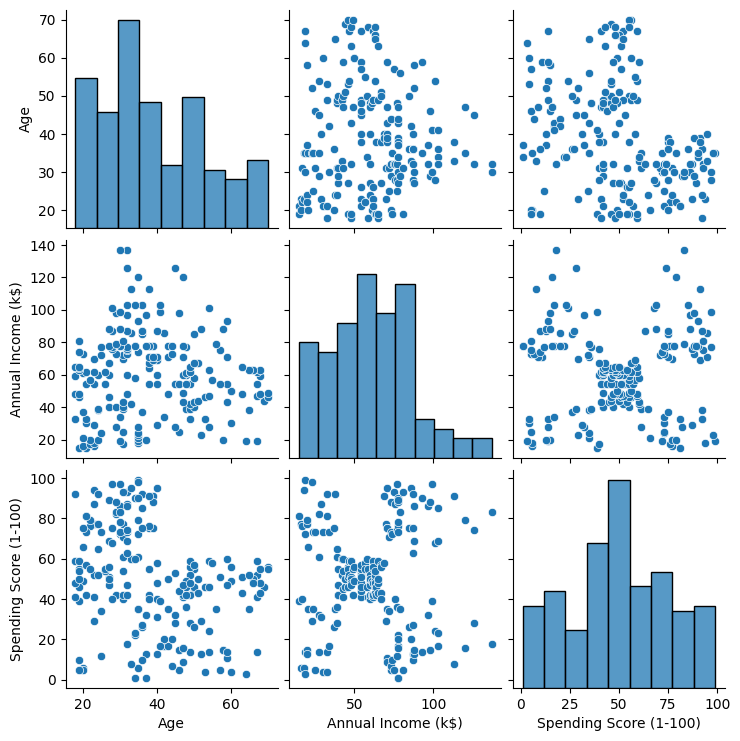

In [13]:
df.describe()
sns.pairplot(df[['Age','Annual Income (k$)','Spending Score (1-100)']])
plt.show()


In [4]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


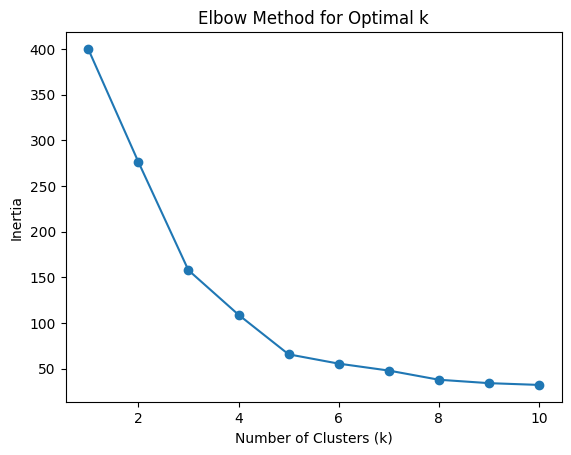

In [6]:
inertia = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, random_state=56)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1,11), inertia, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()


In [7]:
kmeans = KMeans(n_clusters=5, random_state=56)
df['Cluster'] = kmeans.fit_predict(X_scaled)


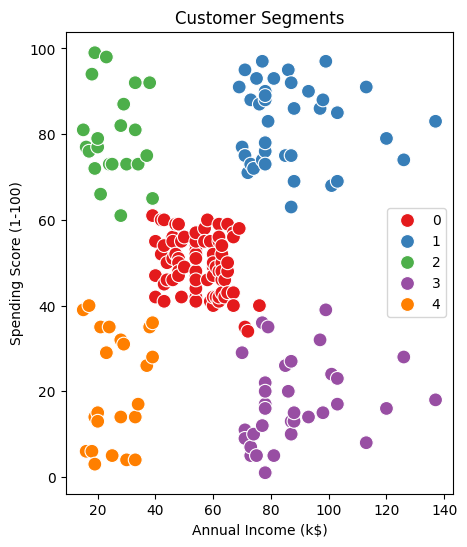

In [10]:
plt.figure(figsize=(5,6))
sns.scatterplot(x=X[:,0], y=X[:,1], hue=df['Cluster'], palette='Set1', s=100)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Customer Segments")
plt.legend()
plt.show()


In [17]:

print("Evaluation Metrics for KMeans (k=5):")
print(f"Inertia (WCSS): {inertia:.2f}")



Evaluation Metrics for KMeans (k=5):
Inertia (WCSS): 65.57
